# More Exploratory Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
asos_data = pd.read_csv('/share/data/ESCI446/ASOS/LNS.csv')
asos_data['Datetime'] = pd.to_datetime(asos_data['valid'])
asos_data = asos_data.set_index('Datetime')

asos_data

/tmp/ipykernel_1958/3448280916.py:1: DtypeWarning: Columns (10,18,24,25,26,29) have mixed types. Specify dtype option on import or set low_memory=False.
  asos_data = pd.read_csv('/share/data/ESCI446/ASOS/LNS.csv')


,station,valid,lon,lat,elevation,tmpf,dwpf,relh,drct,sknt,...,wxcodes,ice_accretion_1hr,ice_accretion_3hr,ice_accretion_6hr,peak_wind_gust,peak_wind_drct,peak_wind_time,feel,metar,snowdepth
Datetime,,,,,,,,,,,,,,,,,,,,,
1992-01-01 00:00:00,LNS,1992-01-01 00:00,-76.2944,40.1203,123.0,30.20,14.18,50.87,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.20,KLNS 010000Z AUTO 00000KT 50SM M01/M10 A3063 R...,NaN
1992-01-01 01:00:00,LNS,1992-01-01 01:00,-76.2944,40.1203,123.0,27.14,20.12,74.52,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.14,KLNS 010100Z AUTO 00000KT 30SM M03/M07 A3063 R...,NaN
1992-01-01 02:00:00,LNS,1992-01-01 02:00,-76.2944,40.1203,123.0,23.18,18.14,80.72,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.18,KLNS 010200Z AUTO 00000KT 30SM M05/M08 A3063 R...,NaN
1992-01-01 03:00:00,LNS,1992-01-01 03:00,-76.2944,40.1203,123.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KLNS 010300Z AUTO RMK IEM_DS3505,NaN
1992-01-01 04:00:00,LNS,1992-01-01 04:00,-76.2944,40.1203,123.0,23.18,16.16,74.11,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.18,KLNS 010400Z AUTO 00000KT 50SM M05/M09 A3062 R...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 19:53:00,LNS,2022-12-30 19:53,-76.2944,40.1203,123.0,61.00,37.90,42.24,110.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.00,KLNS 301953Z 11004KT 10SM FEW070 16/03 A3018 R...,NaN
2022-12-30 20:53:00,LNS,2022-12-30 20:53,-76.2944,40.1203,123.0,57.00,39.00,50.88,120.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.00,KLNS 302053Z 12006KT 10SM CLR 14/04 A3018 RMK ...,NaN
2022-12-30 21:53:00,LNS,2022-12-30 21:53,-76.2944,40.1203,123.0,50.00,37.00,60.79,140.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.00,KLNS 302153Z 14007KT 10SM CLR 10/03 A3020 RMK ...,NaN


## Handling Duplicate Records in the DataFrame

In [3]:
asos_data = asos_data.drop_duplicates()

## Handling Missing Data

<AxesSubplot:xlabel='Datetime', ylabel='Temperature [F]'>

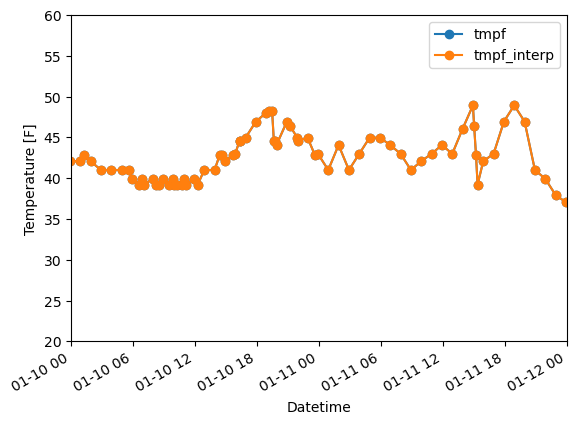

In [4]:
asos_data['tmpf_interp'] = asos_data['tmpf'].interpolate(method='time')
asos_data.plot(kind='line', y=['tmpf','tmpf_interp'],\
               ylabel='Temperature [F]',\
               xlim=('2000-01-10','2000-01-12'),\
               ylim=(20,60), marker='o')


## Categorical Data in Pandas 

Some of our columns are strings that denote the sky cover and the weather codes that are included in the METARs.  These are categorical data, instead of continuous data such as what we'd see for temperature or pressure.  We can set these columns are "categorical" types in Pandas with this code:

In [5]:
asos_data['wxcodes'] = asos_data['wxcodes'].astype('category')
asos_data['skyc1'] = asos_data['skyc1'].astype('category')
asos_data['skyc2'] = asos_data['skyc2'].astype('category')
asos_data['skyc3'] = asos_data['skyc3'].astype('category')
asos_data['skyc4'] = asos_data['skyc4'].astype('category')

### Histograms for Categorical Data

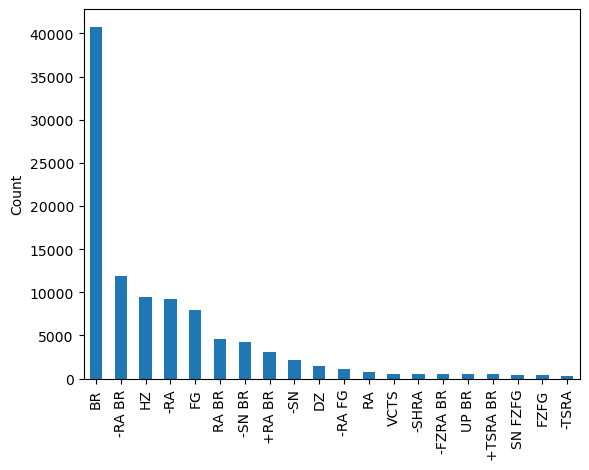

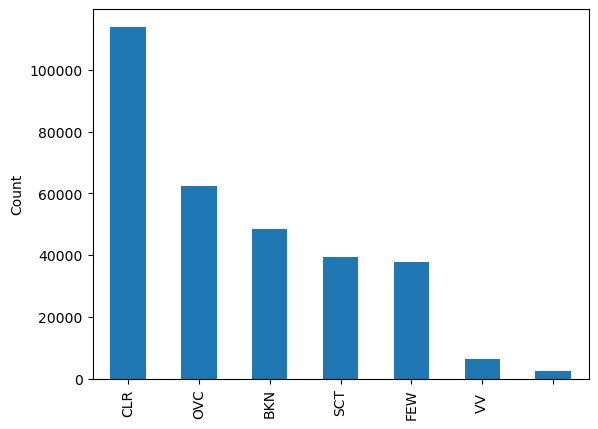

In [6]:
asos_data['wxcodes'].value_counts().iloc[:20].plot(kind='bar', ylabel='Count')
plt.show()
asos_data['skyc1'].value_counts().plot(kind='bar', ylabel='Count')
plt.show()

## Z-Scores

<AxesSubplot:xlabel='Datetime', ylabel='Z-Score'>

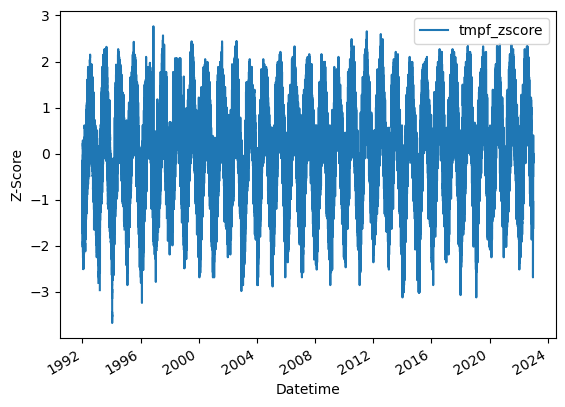

In [7]:
from scipy.stats import zscore

asos_data['tmpf_zscore'] = zscore(asos_data['tmpf'], nan_policy='omit')
asos_data.plot(kind='line', y='tmpf_zscore', ylabel='Z-Score')

## Paired Data

<AxesSubplot:xlabel='tmpf', ylabel='mslp'>

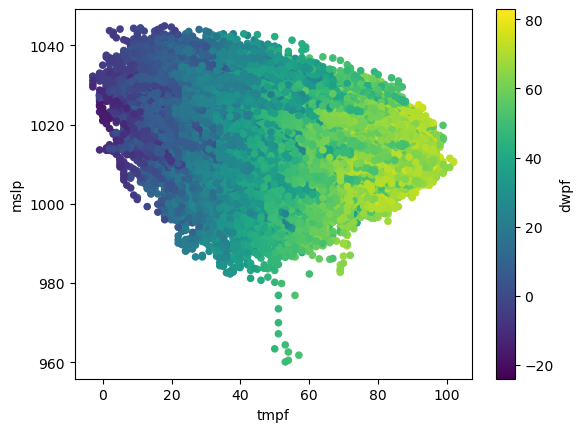

In [8]:
asos_data.plot(kind='scatter', x='tmpf', y='mslp', c='dwpf')

<AxesSubplot:xlabel='tmpf', ylabel='sknt'>

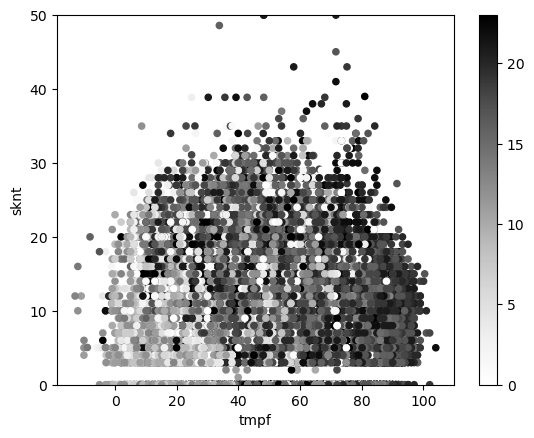

In [37]:
asos_data.plot(kind='scatter',x='tmpf',y='sknt',c=asos_data.index.hour, colorbar=True, ylim=(0,50))

## Pearson (Ordinary) Correlation

/tmp/ipykernel_1958/3354904901.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson = asos_data.corr(method='pearson')


<AxesSubplot:>

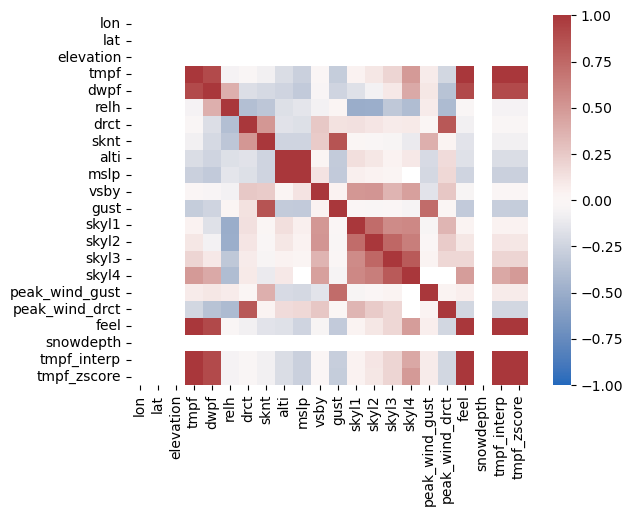

In [9]:
pearson = asos_data.corr(method='pearson')

sns.heatmap(pearson, cmap="vlag", vmin=-1, vmax=1)

## Spearman Rank Correlation and Kendall's Tau

In [10]:
spearman = asos_data.corr(method='spearman')
kendall = asos_data.corr(method='kendall')

/tmp/ipykernel_1958/1494956564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman = asos_data.corr(method='spearman')
/tmp/ipykernel_1958/1494956564.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  kendall = asos_data.corr(method='kendall')
/opt/conda/envs/mvu-spring-2023/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5283: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


<AxesSubplot:>

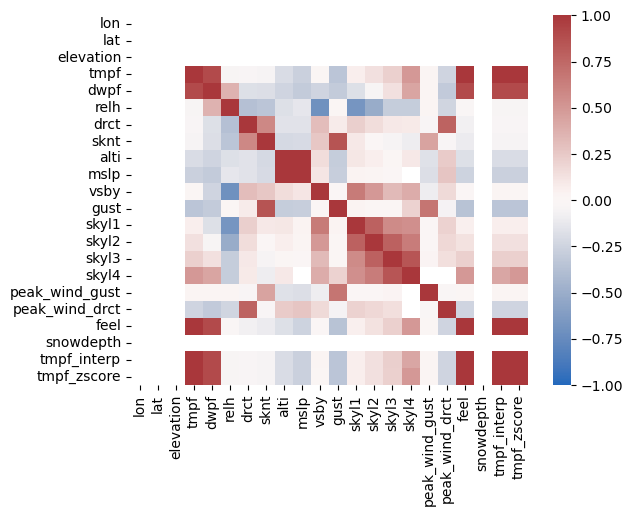

In [11]:
sns.heatmap(spearman, cmap="vlag", vmin=-1, vmax=1)

## Serial Correlation and the Autocorrelation Function

In [12]:
# Creating Autocorrelation plot
asos_data['tmpf_interp'] = asos_data['tmpf'].interpolate(method='time')
temp_ts = asos_data['tmpf_interp'].loc['2000-01-10 00:00':'2000-01-31 00:00']
temp_ts2 = temp_ts.resample('H').nearest()

The horizontal lines in the plot correspond to 95% and 99% confidence bands.

The dashed line is 99% confidence band.

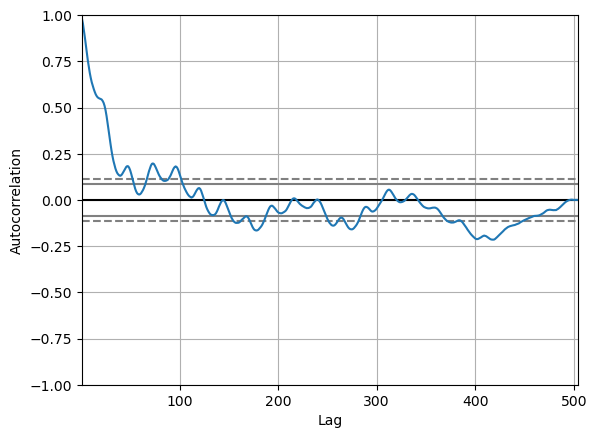

In [13]:
x = pd.plotting.autocorrelation_plot(series=temp_ts2)

# plotting the Curve
x.plot()
 
# Display
plt.show()

## The Scatterplot Matrix

In [24]:
subset = asos_data.loc[:,['tmpf','dwpf','mslp','gust','sknt','drct','skyc1']]
subset2 = subset.drop_duplicates()

False
True


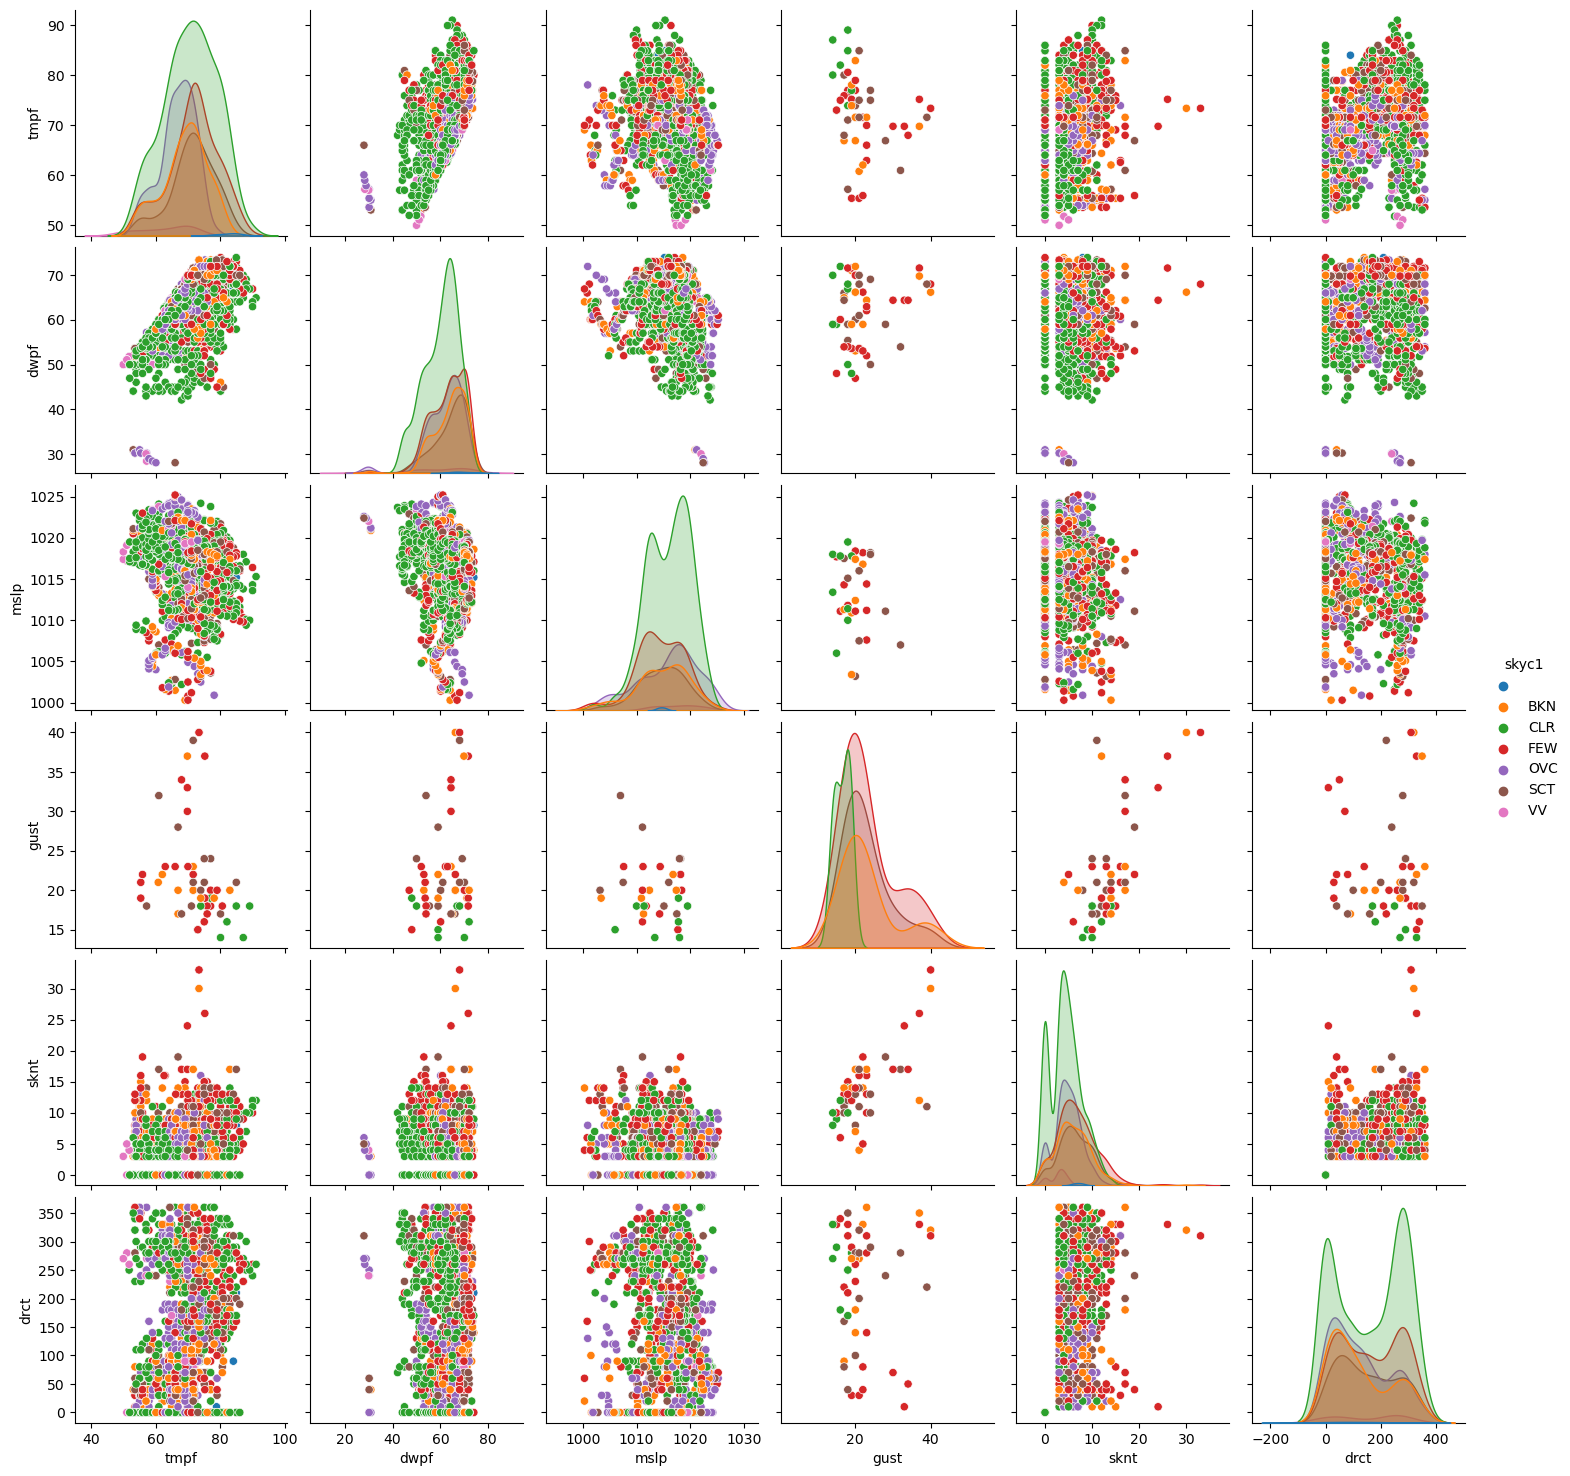

In [41]:
sns.pairplot(subset2.loc['2004-06-01':'2004-08-01'], hue='skyc1', dropna=True)